## Лабораторная работа №2
## Вариант №2
#### Дорохин Андрей 221-361

Для оценки точности алгоритма будет использоваться матрица ошибок

## [TN, FP]
## [FN, TP]

TN — число объектов класса 0, правильно классифицированных как 0.

FP — число объектов класса 0, ошибочно классифицированных как 1.

FN — число объектов класса 1, ошибочно классифицированных как 0.

TP — число объектов класса 1, правильно классифицированных как 1.

 Модель с K=5
Точность (Accuracy): 67.53%

Матрица ошибок:
[[75 25]
 [25 29]]

Поиск оптимального K:
K =  1  Точность кросс-валидации: 66.93%
K =  2  Точность кросс-валидации: 70.19%
K =  3  Точность кросс-валидации: 71.33%
K =  4  Точность кросс-валидации: 72.31%
K =  5  Точность кросс-валидации: 73.45%
K =  6  Точность кросс-валидации: 74.10%
K =  7  Точность кросс-валидации: 74.43%
K =  8  Точность кросс-валидации: 74.92%
K =  9  Точность кросс-валидации: 75.89%
K = 10  Точность кросс-валидации: 74.76%
K = 11  Точность кросс-валидации: 75.57%
K = 12  Точность кросс-валидации: 75.73%
K = 13  Точность кросс-валидации: 77.03%
K = 14  Точность кросс-валидации: 75.57%
K = 15  Точность кросс-валидации: 75.41%
K = 16  Точность кросс-валидации: 75.90%
K = 17  Точность кросс-валидации: 75.74%
K = 18  Точность кросс-валидации: 76.39%
K = 19  Точность кросс-валидации: 75.73%
K = 20  Точность кросс-валидации: 76.23%
K = 21  Точность кросс-валидации: 76.71%
K = 22  Точность кросс-валидации: 75.8

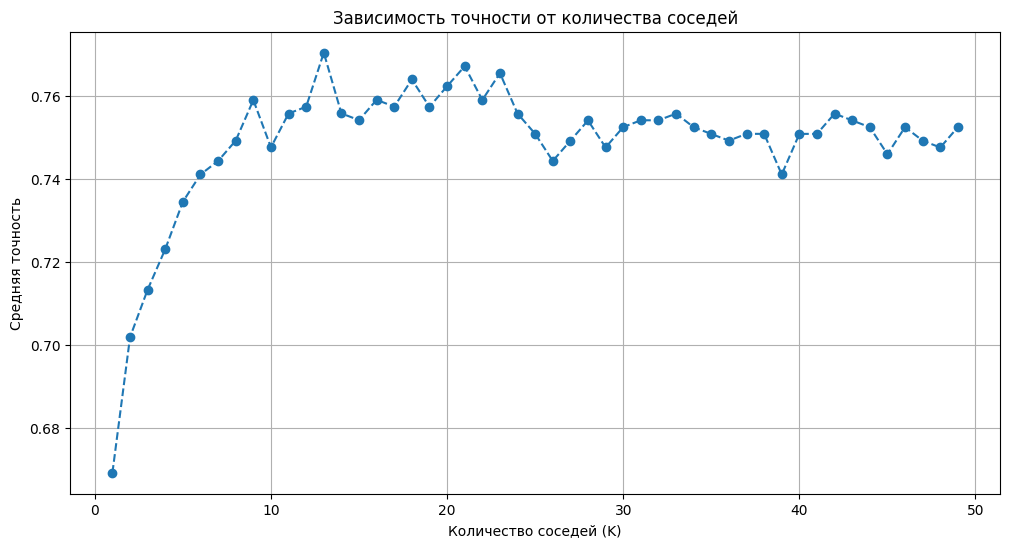


Оптимальное значение K: 13

Модель с оптимальным K=13
Точность (Accuracy): 73.38%
Матрица ошибок:
[[84 16]
 [25 29]]


In [23]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Этап 0: Загрузка и предобработка данных

# Загрузка данных
df = pd.read_csv("diabetes.csv")

# Разделение на признаки и целевую переменную
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Разделение на тренировочную и тестовую выборки ПЕРЕД обработкой
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=49,
    stratify=y
)

# Замена нулевых значений на медиану ТРЕНИРОВОЧНЫХ данных
columns_to_fix = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for column in columns_to_fix:
    # Вычисляем медиану по тренировочной выборке
    train_median = X_train[column].median()
    # Заменяем нули в тренировочных и тестовых данных
    X_train[column] = X_train[column].replace(0, train_median)
    X_test[column] = X_test[column].replace(0, train_median)

# Этап 1: Нормализация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Этап 2: Обучение модели
kn = 5
knn = KNeighborsClassifier(n_neighbors=kn)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# Этап 3: Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
print(f" Модель с K={kn}")
print(f"Точность (Accuracy): {accuracy * 100:.2f}%")

# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nМатрица ошибок:")
print(conf_matrix)

# Подбор оптимального K
k_values = list(range(1, 50))  # Диапазон поиска
mean_accuracies = []

print("\nПоиск оптимального K:")
for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(
        knn_temp,
        X_train_scaled,
        y_train,
        cv=5,
        scoring="accuracy"
    )
    mean_accuracy = scores.mean()
    mean_accuracies.append(mean_accuracy)
    
    print(f"K = {k:2d}  Точность кросс-валидации: {mean_accuracy * 100:.2f}%")

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(k_values, mean_accuracies, marker='o', linestyle='--')
plt.title("Зависимость точности от количества соседей")
plt.xlabel("Количество соседей (K)")
plt.ylabel("Средняя точность")
plt.grid(True)
plt.show()

# Выбор оптимального K
optimal_k = k_values[np.argmax(mean_accuracies)]
print(f"\nОптимальное значение K: {optimal_k}")

# Проверка модели с оптимальным K
final_knn = KNeighborsClassifier(n_neighbors=optimal_k)
final_knn.fit(X_train_scaled, y_train)
y_pred_final = final_knn.predict(X_test_scaled)

# Оценка финальной модели
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"\nМодель с оптимальным K={optimal_k}")
print(f"Точность (Accuracy): {final_accuracy * 100:.2f}%")
print("Матрица ошибок:")
print(confusion_matrix(y_test, y_pred_final))

## 1. Что такое алгоритм K ближайших соседей (KNN)?
Алгоритм K ближайших соседей (K-Nearest Neighbors, KNN) — это простой и интуитивно понятный алгоритм машинного обучения, используемый для задач классификации и регрессии. Он относится к категории ленивых алгоритмов (lazy learning), так как не строит явную модель на этапе обучения, а откладывает все вычисления до момента предсказания.

#### Основная идея:
Чтобы определить класс нового объекта, алгоритм находит k ближайших к нему объектов в обучающей выборке и выбирает класс, который встречается чаще всего среди этих k соседей.
## 2.  Как выбирается класс объекта в алгоритме KNN?
Класс объекта выбирается на основе голосования среди k ближайших соседей. Процесс выглядит так: 
1. Для нового объекта вычисляются расстояния до всех объектов в обучающей выборке.
2. Выбираются k объектов с наименьшими расстояниями (ближайшие соседи).
3. Среди этих k соседей определяется, какой класс встречается чаще всего.
4. Новому объекту присваивается этот наиболее частый класс.
## 3. Как влияет количество соседей на работу алгоритма?
Количество соседей 
k — это гиперпараметр, который сильно влияет на работу алгоритма:
#### 1. Малое значение k (например, k=1): 
- Модель становится более чувствительной к шуму и выбросам в данных. Может возникнуть переобучение (модель слишком хорошо подстраивается под обучающие данные, но плохо обобщает на новые данные).
- Границы между классами становятся более сложными (изрезанными).
#### 2. Большое значение k (например, k=50):
- Модель становится более устойчивой к шуму и выбросам.
- Может возникнуть недообучение (модель слишком упрощает данные, игнорируя важные особенности).
- Границы между классами становятся более гладкими.
#### 3. Оптимальное значение k:
- Обычно выбирается с помощью кросс-валидации.
Оптимальное k зависит от данных: для небольших датасетов лучше маленькие k, для больших — большие.
#### Какую метрику Вы использовали в алгоритме KNN?
1) Точность при кросс-валидации
2) Точность по матрице ошибок